In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

In [33]:
rhpass=pd.read_csv("netbus.csv", parse_dates=['Time'])
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info
0,2011-11-16 10:31:01,10.10.10.15,10.10.10.25,SMB,107,Echo Request
1,2011-11-16 10:31:01,Tp-LinkT_80:e5:1a,Broadcast,ARP,60,Who has 10.10.10.15? Tell 10.10.10.25
2,2011-11-16 10:31:01,Tp-LinkT_b5:79:3f,Tp-LinkT_80:e5:1a,ARP,60,10.10.10.15 is at 00:23:cd:b5:79:3f
3,2011-11-16 10:31:01,10.10.10.25,10.10.10.15,SMB,107,Echo Response
4,2011-11-16 10:31:01,10.10.10.15,10.10.10.25,TCP,60,20964 > 445 [ACK] Seq=54 Ack=54 Win=16884 Len=0


In [34]:
rhpass["Type"] = rhpass.apply(lambda x: "Client" if x["Source"] == rhpass.irow(0)["Source"] else "Server", axis=1)

In [35]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-16 10:31:01,10.10.10.15,10.10.10.25,SMB,107,Echo Request,Client
1,2011-11-16 10:31:01,Tp-LinkT_80:e5:1a,Broadcast,ARP,60,Who has 10.10.10.15? Tell 10.10.10.25,Server
2,2011-11-16 10:31:01,Tp-LinkT_b5:79:3f,Tp-LinkT_80:e5:1a,ARP,60,10.10.10.15 is at 00:23:cd:b5:79:3f,Server
3,2011-11-16 10:31:01,10.10.10.25,10.10.10.15,SMB,107,Echo Response,Server
4,2011-11-16 10:31:01,10.10.10.15,10.10.10.25,TCP,60,20964 > 445 [ACK] Seq=54 Ack=54 Win=16884 Len=0,Client


In [36]:
infodata2 = rhpass[['Length','Time','Info']]
infodata2.head()

,Length,Time,Info
0,107,2011-11-16 10:31:01,Echo Request
1,60,2011-11-16 10:31:01,Who has 10.10.10.15? Tell 10.10.10.25
2,60,2011-11-16 10:31:01,10.10.10.15 is at 00:23:cd:b5:79:3f
3,107,2011-11-16 10:31:01,Echo Response
4,60,2011-11-16 10:31:01,20964 > 445 [ACK] Seq=54 Ack=54 Win=16884 Len=0


In [37]:
infodata2 = infodata2.set_index('Time')
infodata2.head()

,Length,Info
Time,,
2011-11-16 10:31:01,107,Echo Request
2011-11-16 10:31:01,60,Who has 10.10.10.15? Tell 10.10.10.25
2011-11-16 10:31:01,60,10.10.10.15 is at 00:23:cd:b5:79:3f
2011-11-16 10:31:01,107,Echo Response
2011-11-16 10:31:01,60,20964 > 445 [ACK] Seq=54 Ack=54 Win=16884 Len=0


In [38]:
infodata2.resample('T',how=sum).head()

,Length
Time,
2011-11-16 10:31:00,154519
2011-11-16 10:32:00,200818
2011-11-16 10:33:00,2462
2011-11-16 10:34:00,139743
2011-11-16 10:35:00,334


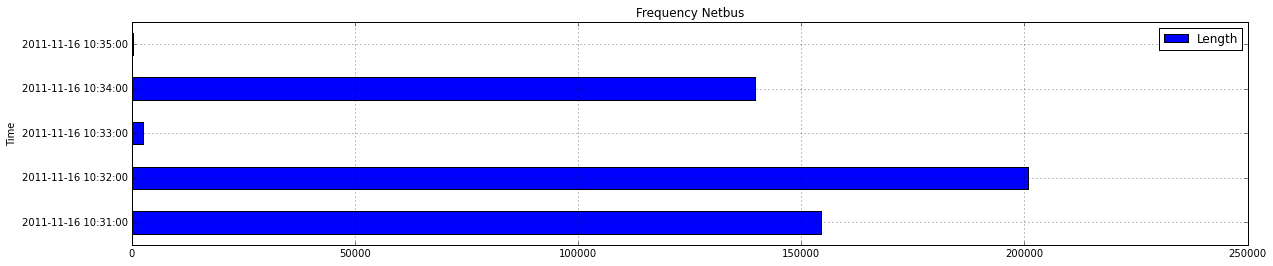

In [39]:
infodata2_plot = infodata2.resample('T',how=sum).plot(kind="barh",title="Frequency Netbus",figsize=(20,4),legend=True)

In [40]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi DOS.png")

In [41]:
rhpass.head()

,Time,Source,Destination,Protocol,Length,Info,Type
0,2011-11-16 10:31:01,10.10.10.15,10.10.10.25,SMB,107,Echo Request,Client
1,2011-11-16 10:31:01,Tp-LinkT_80:e5:1a,Broadcast,ARP,60,Who has 10.10.10.15? Tell 10.10.10.25,Server
2,2011-11-16 10:31:01,Tp-LinkT_b5:79:3f,Tp-LinkT_80:e5:1a,ARP,60,10.10.10.15 is at 00:23:cd:b5:79:3f,Server
3,2011-11-16 10:31:01,10.10.10.25,10.10.10.15,SMB,107,Echo Response,Server
4,2011-11-16 10:31:01,10.10.10.15,10.10.10.25,TCP,60,20964 > 445 [ACK] Seq=54 Ack=54 Win=16884 Len=0,Client


In [42]:
category_group=rhpass.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination Protocol        
10.10.10.15 10.10.10.25 FTP          486
                        HTTP         403
                        SMB          856
                        TCP        13204
10.10.10.25 10.10.10.15 FTP          644

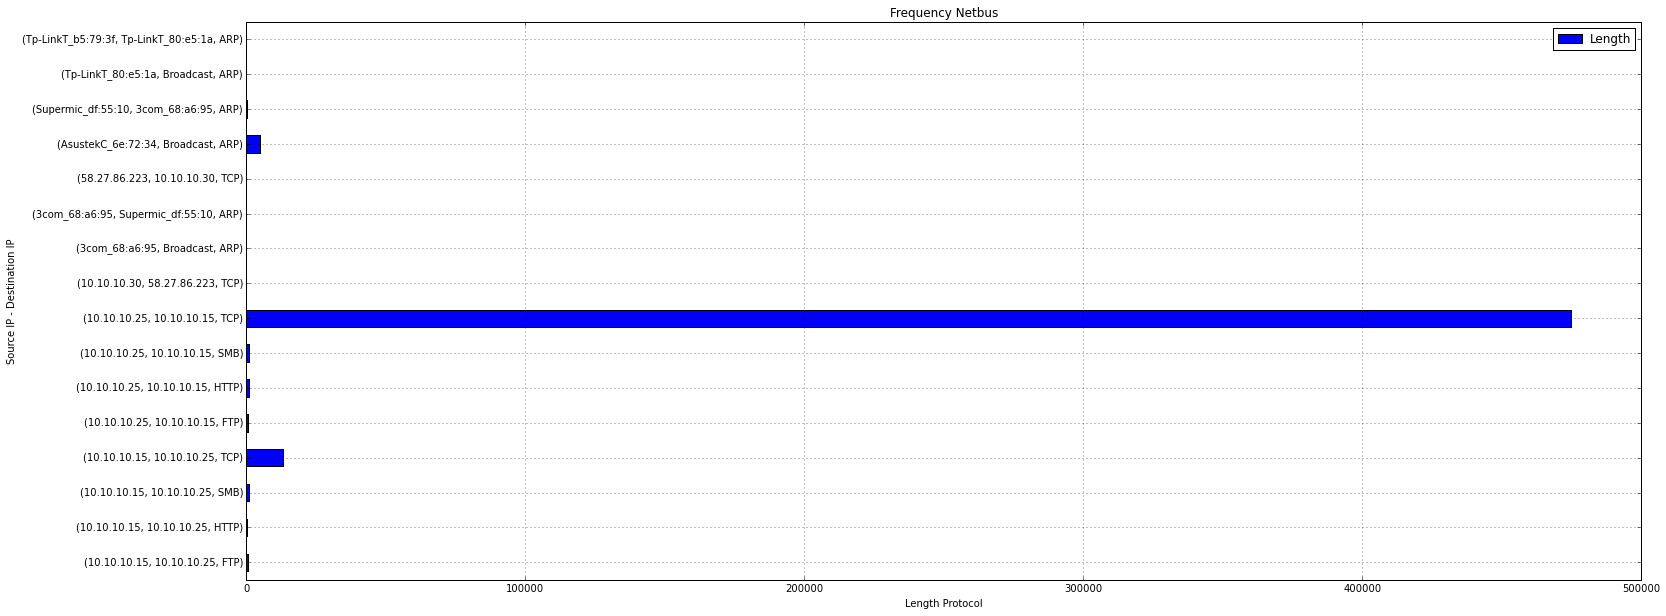

In [43]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Frequency Netbus",figsize=(25,10))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

In [44]:
fig = infodata2_plot.get_figure()
fig.savefig("Frekuensi netbus.png")